<a href="https://colab.research.google.com/github/glaiml/prj8-neural-net-img-classification/blob/master/vgk-neuner-img-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vinayak G Kudva Project submission for GLAIML 
https://github.com/glaiml/prj8-neural-net-img-classification

# The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important
component of modern-day map making. A classic example of a corpus of such street
level photographs is Google’s Street View imagery comprised of hundreds of millions of
geo-located 360 degree panoramic images. The ability to automatically transcribe an
address number from a geo-located patch of pixels and associate the transcribed
number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.
More broadly, recognizing numbers in photographs is a problem of interest to the optical
character recognition community. While OCR on constrained domains like document
processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual
appearance of text in the wild on account of a large range of fonts, colors, styles,
orientations, and character arrangements. The recognition problem is further
complicated by environmental factors such as lighting, shadows, specularities, and
occlusions as well as by image acquisition factors such as resolution, motion, and focus
blurs.
In this project we will use dataset with images centred around a single digit (many of the
images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.

# Project Description
In this hands-on project the goal is to build a python code for image classification from
scratch to understand the nitty gritties of building and training a model and further to
understand the advantages of neural networks. First we will implement a simple KNN
classifier and later implement a Neural Network to classify the images in the SVHN
dataset. We will compare the computational efficiency and accuracy between the
traditional methods and neural networks.

# The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes from a
significantly harder, unsolved, real world problem (recognizing digits and numbers in
natural scene images). SVHN is obtained from house numbers in Google Street View
images.

# Overview
The images come in two formats as shown below.
Format 1 : Original images with character level bounding boxes.
Format 2 : MNIST-like 32-by-32 images centered around a single character (many
of the images do contain some distractors at the sides).

The goal of this project is to take an image from the SVHN dataset and determine what that digit is.
This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1,
'9' has label 9 and '0' has label 10.
Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of
32-by-32 RGB images centred around a single digit (many of the images do contain some distractors
at the sides).

# Reference
Acknowledgement for the datasets.
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng
Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop
on Deep Learning and Unsupervised Feature Learning 2011. (https://research.google/pubs/pub37648/)

http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

# Downloads

Refer to Olympus for project related files and instructions.
Data Set:
● The name of the dataset is SVHN_single_grey1.h5
● The data is a subset of the original dataset. Use this subset only for the
project.
● Keep a copy of your dataset in your own google drive.

# Project Objectives
The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network.

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data fetching and understand the train/val/test splits

In [0]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/NuNetProject/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [17]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [18]:
# Flatten X Train and X Test
X_train_flat = X_train.reshape(42000, 1024)
print (X_train_flat.shape)

X_test_flat = X_test.reshape(18000, 1024)
print (X_test_flat.shape)


(42000, 1024)
(18000, 1024)


# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

[0.6438333333333334, 0.6447222222222222, 0.6450555555555556, 0.6444444444444445, 0.6449444444444444, 0.6467777777777778, 0.6475555555555556, 0.6478888888888888, 0.6468888888888888, 0.6478333333333334, 0.6474444444444445, 0.6479444444444444, 0.6471111111111111, 0.647, 0.6461666666666667, 0.6465, 0.6461111111111111, 0.6450555555555556, 0.6441111111111111, 0.6438888888888888]


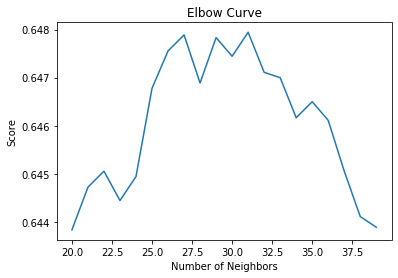

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as pl
Nc = range(20, 40)
knnElbow = [KNeighborsClassifier(n_neighbors=i, weights='distance', metric = 'cosine', n_jobs = 50) for i in Nc]
knnElbow
score = [knnElbow[j].fit(X_train_flat, y_train).score(X_test_flat, y_test) for j in range(len(knnElbow))]
print(score)
pl.plot(Nc,score)
pl.xlabel('Number of Neighbors')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [0]:
KNC = KNeighborsClassifier(n_neighbors= 31, weights='distance', metric = 'cosine', n_jobs = 50)
# Call Nearest Neighbour algorithm

KNC.fit(X_train_flat, y_train)
pred_train = KNC.predict(X_train_flat)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print ("Training Accuracy ::")
KNC.score(X_train_flat, y_train)

Training Accuracy ::


1.0

In [0]:
pred_y = KNC.predict(X_test_flat)

In [10]:
print ("Test Accuracy ::")
KNC.score(X_test_flat, y_test)

Test Accuracy ::


0.6479444444444444

# Print the classification metric report (2.5 points)

In [11]:
from sklearn import metrics
print("KNN Metrics = \n", metrics.classification_report(y_test, pred_y))

KNN Metrics = 
               precision    recall  f1-score   support

           0       0.57      0.76      0.65      1814
           1       0.56      0.79      0.66      1828
           2       0.78      0.62      0.70      1803
           3       0.60      0.55      0.57      1719
           4       0.73      0.77      0.75      1812
           5       0.71      0.51      0.59      1768
           6       0.64      0.56      0.60      1832
           7       0.73      0.74      0.74      1808
           8       0.59      0.55      0.57      1812
           9       0.66      0.61      0.63      1804

    accuracy                           0.65     18000
   macro avg       0.66      0.65      0.65     18000
weighted avg       0.66      0.65      0.65     18000



# Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

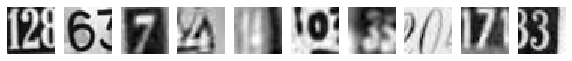

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [0]:
import tensorflow as tf

trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [46]:
trainY[1:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
model = Sequential()
model.add(Dense(1024, input_shape = (1024,)))
model.add(BatchNormalization())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
sgd = optimizers.Adam(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_14 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_63 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_37 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_38 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 1024)            

In [38]:
model.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 500, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 3s 77us/step - loss: 2.4034 - acc: 0.1000 - val_loss: 2.3032 - val_acc: 0.0982
Epoch 2/500
42000/42000 [==============================] - 1s 32us/step - loss: 2.2980 - acc: 0.1077 - val_loss: 2.2667 - val_acc: 0.1316
Epoch 3/500
42000/42000 [==============================] - 1s 33us/step - loss: 2.2096 - acc: 0.1523 - val_loss: 2.2193 - val_acc: 0.1381
Epoch 4/500
42000/42000 [==============================] - 1s 32us/step - loss: 2.1016 - acc: 0.1858 - val_loss: 2.0741 - val_acc: 0.1929
Epoch 5/500
42000/42000 [==============================] - 1s 32us/step - loss: 2.1044 - acc: 0.1710 - val_loss: 2.1456 - val_acc: 0.1418
Epoch 6/500
42000/42000 [==============================] - 1s 32us/step - loss: 2.0670 - acc: 0.1855 - val_loss: 2.1453 - val_acc: 0.1888
Epoch 7/500
42000/42000 [==============================] - 1s 32us/step - loss: 2.0418 - acc: 0.1970 - val_loss: 1.9975 - 

# Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

# Implement batch normalization for training the neural network (2.5 points)

# Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)